# Potato Image Classification Using Machine Learning

###            Done by: Dennis Mwenda


## 1. Libraries Used

tensorflow
keras
numpy
matplotlib
seaborn
sklearn

## 2. Objective
The goal of this project is to build an image classification model that accurately identifies different categories of potatoes (healthy or diseased) using machine learning techniques.

## 3. Expected Results
A deep learning model that classifies potato images with high accuracy.
An interactive Gradio application for real-time potato image classification.
Visual insights on how the model performs on different image datasets.

## 4. Problem Statement
Potato crops are essential to food security worldwide, but they are vulnerable to diseases that can drastically reduce yield. Early detection and classification of diseased potatoes can significantly improve crop management. This project aims to develop an image classification model to assist farmers and agricultural professionals in identifying diseases more effectively.

## 5. Application
The trained deep learning model will be deployed using Gradio to create an easy-to-use interface for potato image classification. Users will upload images, and the app will provide immediate feedback on the category of the potato (healthy or diseased).










In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import bokeh
import tensorflow as tf
import keras
import sklearn
import xgboost
import lightgbm
import imblearn
import category_encoders as ce
import statsmodels.api as sm
import tqdm
import joblib

print("All libraries are successfully imported!")


All libraries are successfully imported!


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras import layers


In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCH = 25

In [4]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    'potatoe project',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names =df.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
#checking length
len(df)

68

In [7]:
for image_batch, label_batch in df.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1]


In [8]:
# printing images in array form

for image_batch, label_batch in df.take(1):
    print(image_batch[0].numpy())



[[[178. 176. 187.]
  [183. 181. 192.]
  [181. 179. 190.]
  ...
  [132. 126. 136.]
  [153. 147. 157.]
  [166. 160. 170.]]

 [[178. 176. 187.]
  [182. 180. 191.]
  [181. 179. 190.]
  ...
  [134. 128. 138.]
  [137. 131. 141.]
  [143. 137. 147.]]

 [[184. 182. 193.]
  [184. 182. 193.]
  [181. 179. 190.]
  ...
  [193. 187. 197.]
  [137. 131. 141.]
  [153. 147. 157.]]

 ...

 [[197. 192. 198.]
  [198. 193. 199.]
  [197. 192. 198.]
  ...
  [177. 172. 178.]
  [118. 113. 119.]
  [137. 132. 138.]]

 [[197. 192. 198.]
  [197. 192. 198.]
  [195. 190. 196.]
  ...
  [190. 185. 191.]
  [157. 152. 158.]
  [138. 133. 139.]]

 [[195. 190. 196.]
  [194. 189. 195.]
  [190. 185. 191.]
  ...
  [139. 134. 140.]
  [166. 161. 167.]
  [141. 136. 142.]]]


In [9]:
# checking the images

for image_batch, label_batch in df.take(1):
    
    print(image_batch[0].shape)

(256, 256, 3)


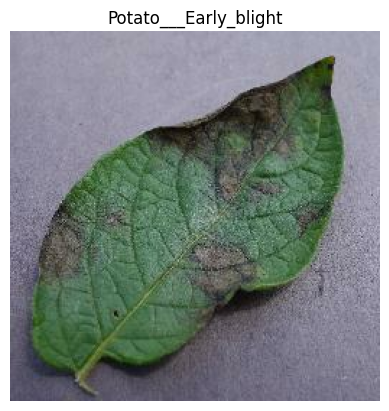

In [10]:
# printing the image itself

for image_batch, label_batch in df.take(1):
    for i in range(12):
        
        
        plt.imshow(image_batch[0].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

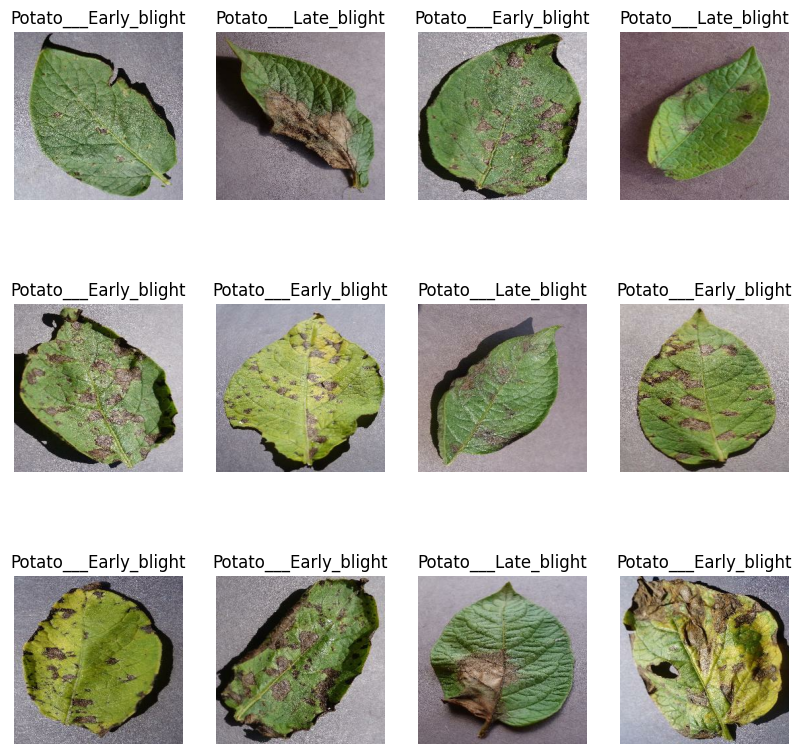

In [11]:
# printing all the images 

plt.figure(figsize = (10,10))
for  image_batch, label_batch in df.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [12]:
# splitting datasest

len(df)

68

In [13]:
'''
80% ==> training
20% ==> 10% validation, 10% test

'''

'\n80% ==> training\n20% ==> 10% validation, 10% test\n\n'

In [14]:
# splitting
train_size = 0.8
len(df)*train_size

54.400000000000006

In [15]:
train_df = df.take(54)
len(train_df)

54

In [16]:
test_df = df.skip(54)
len(test_df)

14

In [17]:
val_size = 0.1
len(df)*val_size

6.800000000000001

In [18]:
val_df = test_df.take(6)
len(val_df)

6

In [19]:
test_df = test_df.skip(6)
len(test_df)

8

In [20]:
# compiling the above into a function

def get_df_partitions_tf(df, train_split = 0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    df_size = len(df)

    if shuffle:
        df = df.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * df_size)
    val_size = int(val_split *df_size)

    train_df = df.take(train_size)

    val_df = df.skip(train_size).take(val_size)
    test_df = df.skip(train_size).skip(val_size)
    
    return train_df, val_df, test_df


In [21]:
train_df, val_df, test_df  = get_df_partitions_tf(df)

In [22]:
# checking len of training set
len(train_df)

54

In [23]:
# confirming size of validation
len(val_df)

6

In [24]:
len(test_df)


8

In [25]:
train_df = train_df.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
val_df = val_df.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
test_df = test_df.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)


In [26]:

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [27]:
# lets make our images noticable in all angles

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2)
])


In [28]:
# Now lets build our model 

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCH = 25

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape = input_shape)

C:\Users\denny\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# checking the summary of the above model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# we define the NN architecture

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)





In [31]:
# training our network

history = model.fit(
    train_df,
    epochs = EPOCH,
    batch_size = BATCH_SIZE, 
    verbose = 1, 
    validation_data = val_df
    
)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 592ms/step - accuracy: 0.4510 - loss: 0.9549 - val_accuracy: 0.7344 - val_loss: 0.8673
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 647ms/step - accuracy: 0.5785 - loss: 0.8576 - val_accuracy: 0.8490 - val_loss: 0.4847
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 662ms/step - accuracy: 0.7967 - loss: 0.5358 - val_accuracy: 0.8698 - val_loss: 0.4144
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 673ms/step - accuracy: 0.8332 - loss: 0.4399 - val_accuracy: 0.8646 - val_loss: 0.3485
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 685ms/step - accuracy: 0.8471 - loss: 0.4058 - val_accuracy: 0.9010 - val_loss: 0.3310
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 685ms/step - accuracy: 0.8695 - loss: 0.3589 - val_accuracy: 0.8958 - val_loss: 0.2967
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 706ms/step - accuracy: 0.8940 - loss: 0.2704 - val_accuracy: 0.9062 - val_loss: 0.2616
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 743ms/step - accuracy: 0.8953 - loss: 0.2951 - val_accu

In [32]:
# lets check how the model performs on the test
scores = model.evaluate(test_df)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.9310 - loss: 0.1843


In [33]:
scores

[0.23298034071922302, 0.921875]

In [34]:
# lets play with history parameter

history

In [35]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 54}

In [36]:
# checking the keys in hist

history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [37]:
# checking the no of accuracy per epochs

history.history['accuracy']

[0.4722222089767456,
 0.6458333134651184,
 0.8061342835426331,
 0.8414351940155029,
 0.8449074029922485,
 0.8807870149612427,
 0.9068287014961243,
 0.9016203880310059,
 0.9265046119689941,
 0.9438657164573669,
 0.9554398059844971,
 0.9357638955116272,
 0.9606481194496155,
 0.9427083134651184,
 0.9693287014961243,
 0.9398148059844971,
 0.9554398059844971,
 0.9658564925193787,
 0.9774305820465088,
 0.9768518805503845,
 0.9704861044883728,
 0.9641203880310059,
 0.9508101940155029,
 0.9756944179534912,
 0.9739583134651184]

In [38]:
# Lets plot the accuracies in a matplot chat

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

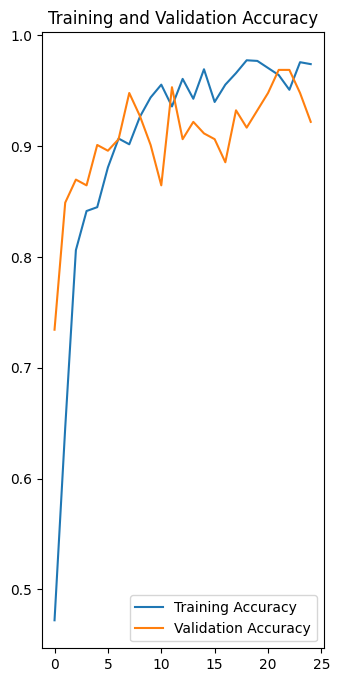

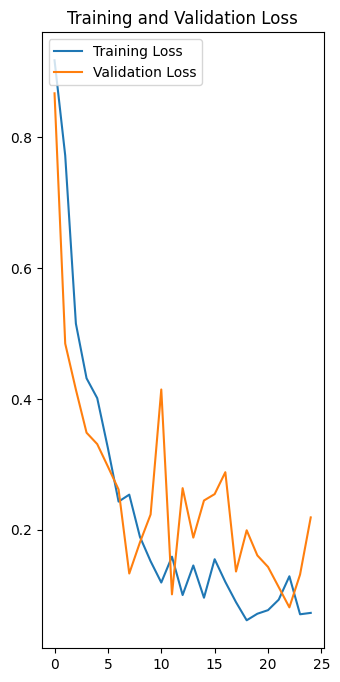

In [39]:
# plotting the accuracies

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label = 'Training Accuracy')
plt.plot(range(EPOCH), val_acc, label = 'Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')


# plotting the loss/errors

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), loss, label = 'Training Loss')
plt.plot(range(EPOCH), val_loss, label = 'Validation Loss')
plt.legend(loc ='upper left')
plt.title('Training and Validation Loss')



first image to predict
first images actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
predicted label: Potato___Late_blight


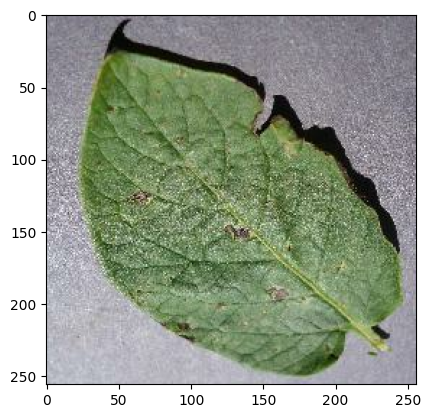

In [40]:
# Now Let us make the predictions

for images_batch, labels_batch in test_df.take(1):

    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    print('first image to predict')
    plt.imshow(first_image)
    print('first images actual label:',class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])

In [41]:
# Function to take a prediction

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # creating a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


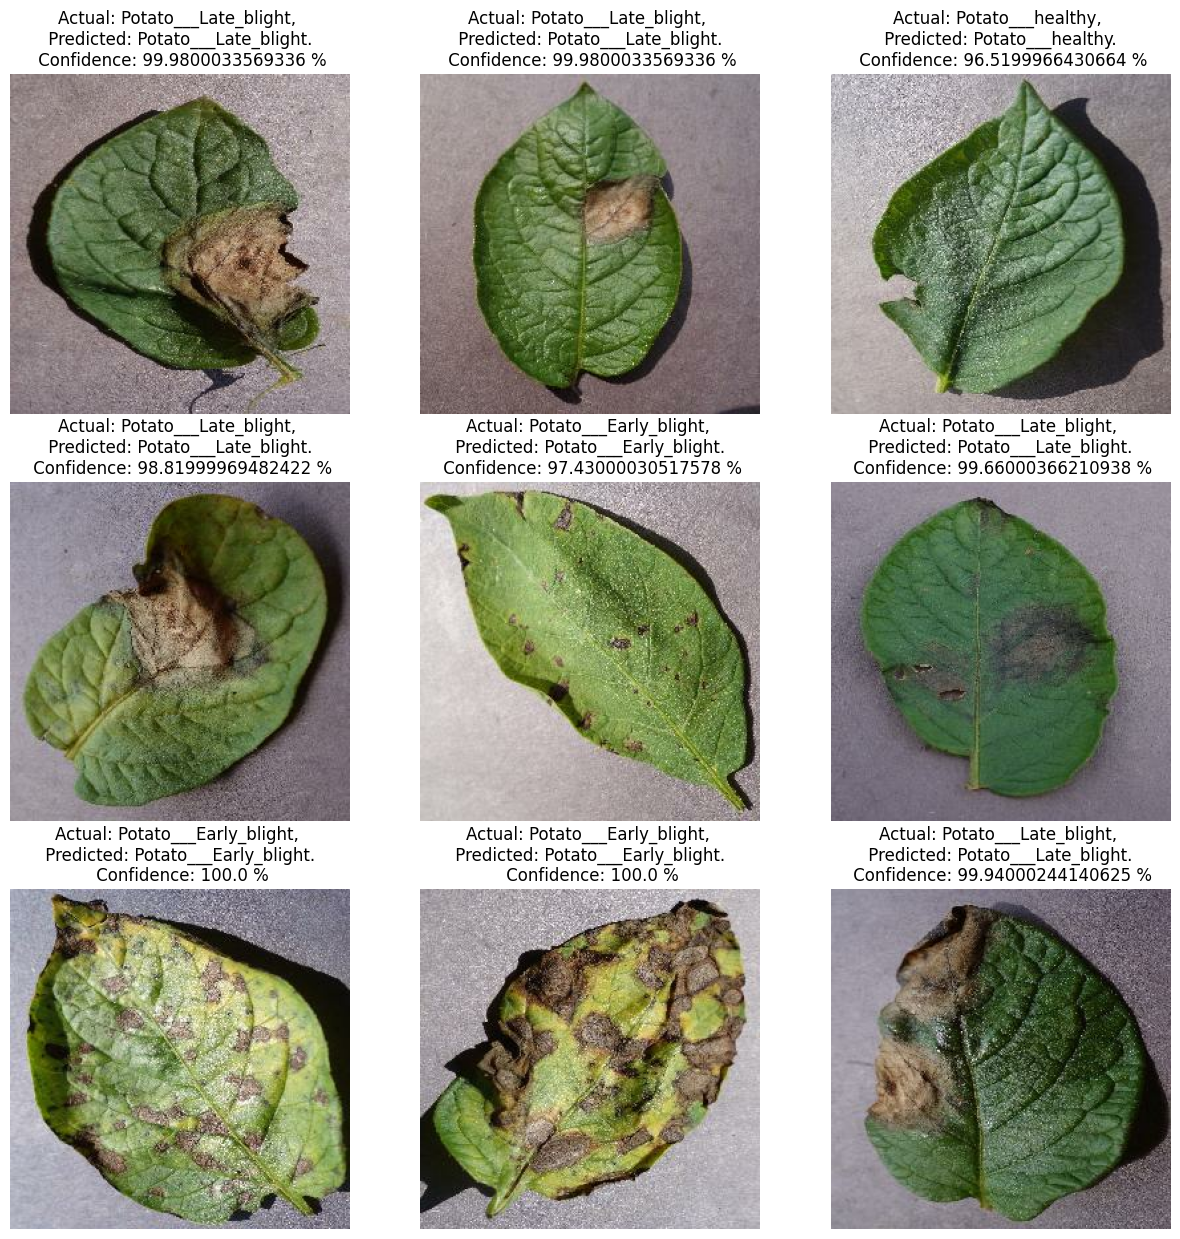

In [42]:
# running predictions on the entire batch
plt.figure(figsize = (15,15))
for images, labels in test_df.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence} %")
        
        plt.axis('off')

In [62]:
import os

# Get the list of model files and extract the numeric part
model_files = [f for f in os.listdir("../models") if f.endswith('.h5')]
model_versions = [int(f.split('.')[0]) for f in model_files]  # Extract the version number from filenames
model_version = max(model_versions + [0]) + 1  # Get the next version number

# Save the model with the new version number
model.save(f"../models/{model_version}.h5")
